In [1]:
# mean salary = 110000
#Step 1. Resample 
# stack_overflow.smaple(frac = 1 , replace = True)["converted_comp"]
# Step 2. Calculate the point estimate 
# np.mean(setp 1's result)
# Step3. Repeat 1 and 2 many times and append the point estimate in a list
# Step 4. standardizing the list's values 
# Use Z-test 

In [2]:
import pandas as pd 
import seaborn as sns 

In [3]:
import numpy as np

## Z-Tests

In [4]:
late_shipments = pd.read_feather("late_shipments.feather")
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [5]:
#Proportion of late shipments 
late_prop = (late_shipments["late"] == "Yes").mean()
late_prop


0.061

In [6]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [7]:
#bootstrapping the sample distribution 
bootstrapped_dist = []
for i in range(1000):
    new_sample = late_shipments.sample(frac = 1 , replace = True )["late"] #bootstrapped sample from the whole data
    bootstrapped_dist.append(
       (new_sample == "Yes").mean() #Appending the proportion of late shipments
    )

In [8]:
#hypothesis testing 
late_prop_null_hyp = 0.06  #Proportion of late shipment as presumed 
std_error = np.std(bootstrapped_dist)

z_score = (late_prop - late_prop_null_hyp)/std_error
z_score

0.130014334096917

In [9]:
#p-values = probability of obtaining result, assuming the null hypothesis is true 
#we pass the z_score to standard normal cdf 
from scipy.stats import norm 
p_value = 1 - norm.cdf(z_score , loc = 0 , scale = 1)
# Left-tailed test -> norm.cdf()
# Right-tailed test -> 1 - norm.cdf()
# Two_tailed test -> 2 * (1 - norm.cdf())

In [10]:
alpha = 0.05 
if p_value > alpha: 
    print(f"Null Hypothesis accepted for p-value of {p_value}")
else: 
    print(f"Null Hypothesis rejected for p-value of {p_value}")


Null Hypothesis accepted for p-value of 0.448277542990961


In [11]:
1 - alpha/2 , alpha/2

(0.975, 0.025)

In [12]:
# Confidence interval 
lower = np.quantile(bootstrapped_dist , 0.025)
upper = np.quantile(bootstrapped_dist , 0.975)
print("Range where the population propotion can be found is " , (lower , upper))

Range where the population propotion can be found is  (0.046, 0.076)


## T-tests

In [13]:
# Comparing sample statistics across groups of a variable 
# Grouping the groups by the value's mean 
# numerator = x_bar1 - x_bar2
# denominator = np.sqrt(std1**2/n1 + std2**2/n2)
# t_stat = numerator / denominator


<Axes: xlabel='late', ylabel='weight_kilograms'>

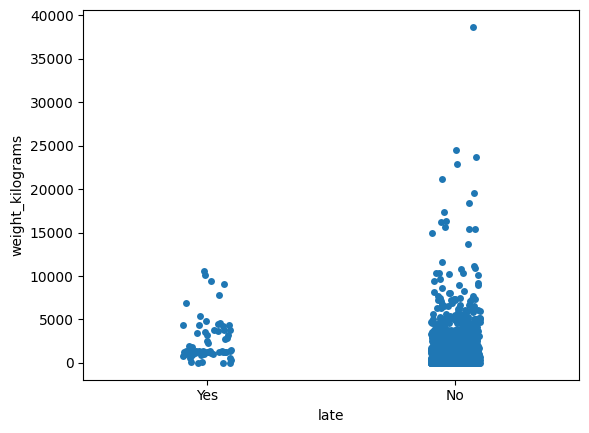

In [14]:
sns.stripplot(data = late_shipments , x = "late" , y ="weight_kilograms")

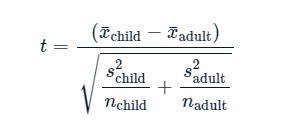

In [15]:
# Testing whether there is significance difference between the average weights of late and ontime shipment
yes_mean = late_shipments[late_shipments["late"] == "Yes"]["weight_kilograms"].mean()
no_mean = late_shipments[late_shipments["late"] == "No"]["weight_kilograms"].mean()
yes_std = late_shipments[late_shipments["late"] == "Yes"]["weight_kilograms"].std()
no_std = late_shipments[late_shipments["late"] == "No"]["weight_kilograms"].std()
yes_n = late_shipments[late_shipments["late"] == "Yes"]["weight_kilograms"].count()
no_n = late_shipments[late_shipments["late"] == "No"]["weight_kilograms"].count()
numerator = no_mean - yes_mean # late ships are more weighed than other
denominator = np.sqrt(yes_std**2 / yes_n + no_std**2/no_n)
t_stat = numerator / denominator
t_stat

-2.3936661778766433

In [16]:
#Calculating the p-value 
from scipy.stats import t 
df = yes_n + no_n - 2 
alpha = 0.05 
p_value = (t.cdf(t_stat , df = df))
p_value 

0.008432382146249523

In [17]:
if p_value <= alpha :
    print(f"Null Hypothesis Rejected: Alt Hypothesis: The mean weight of shipment is more for late ships")
else:
    print(f"Null Hypothesis Accepted: The mean weight of shipment is same for delay type ")
    

Null Hypothesis Rejected: Alt Hypothesis: The mean weight of shipment is more for late ships


## Paired t-tests

In [18]:
us_rep = pd.read_feather("republican_votes.feather")
us_rep.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


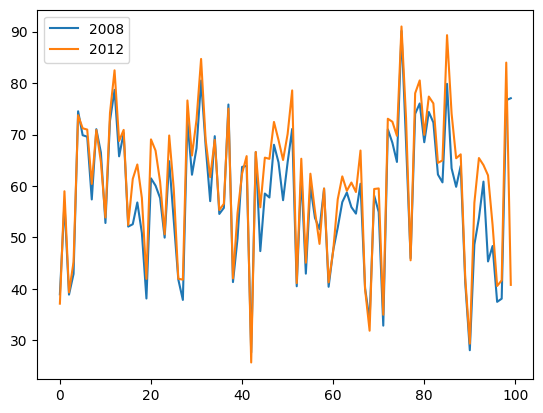

In [19]:
import matplotlib.pyplot as plt 
plt.plot(us_rep["repub_percent_08"] , "-" , label = "2008")
plt.plot(us_rep["repub_percent_12"] , '-' , label = "2012")
plt.legend()


### Was the percentage of Republican candidate votes lower in 2008 than 2012?

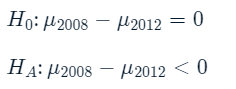

In [20]:
alpha = 0.05 #Significance level
difference = us_rep["repub_percent_08"] - us_rep["repub_percent_12"]
d_bar = np.mean(difference)
s_std = np.std(difference)
n = len(difference)
t_stat = d_bar/(s_std/np.sqrt(n))
df = n - 1
t_stat

-5.629260142435644

In [21]:
p_value = t.cdf(t_stat , df = df)
if p_value <= alpha: 
    print("Null Hypothesis rejected.")
else:
    print("Null Hypothesis accepted")

Null Hypothesis rejected.


<Axes: xlabel='None', ylabel='Count'>

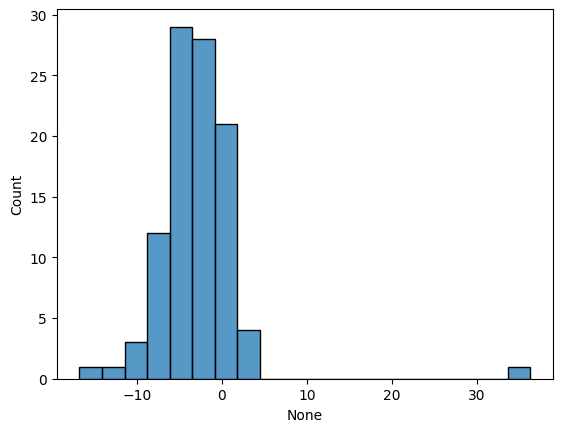

In [22]:
sns.histplot(x = difference , bins = 20  )

## Doing paired test with pingouin package...

In [23]:
import pingouin 

In [24]:
pingouin.ttest(x = difference , 
               y = 0 , 
               alternative= "less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [25]:
pingouin.ttest(x = us_rep["repub_percent_08"] , 
               y = us_rep["repub_percent_12"] , 
               paired = True , 
               alternative = "less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


## ANOVA tests

In [26]:
# ANOVA tests determine whether there are differences within the groups
#alpha = 0.2
#pingouin.anova(data = df , 
# dv = "values" , between="groups")
#We can decrease the chances of Type II error by bonferroni correction

 

In [27]:
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].mean()
s_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].std()
xbar_pack_by_mode , s_pack_by_mode

(shipment_mode
 Air            39.712395
 Air Charter     4.226667
 Ocean           6.432273
 Name: pack_price, dtype: float64,
 shipment_mode
 Air            48.932861
 Air Charter     0.992969
 Ocean           5.303047
 Name: pack_price, dtype: float64)

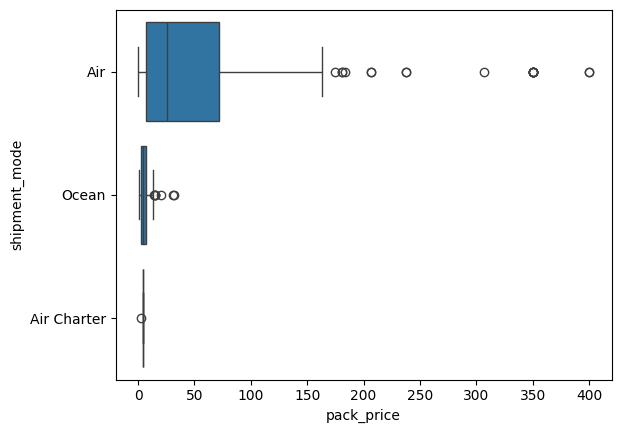

In [28]:
sns.boxplot(data = late_shipments , 
            y= "shipment_mode" , 
            x = "pack_price")
plt.show()

In [29]:
anova_results = pingouin.anova(
    data = late_shipments , 
    dv = "pack_price" , 
    between = "shipment_mode"
)
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [30]:
pairwise_results = pingouin.pairwise_tests(
    data = late_shipments , 
    dv = "pack_price" , 
    between = "shipment_mode" , 
    padjust= "bonf" #with Bonferroni correction
)
pairwise_results = pd.DataFrame(pairwise_results)
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


In [31]:
alpha = 0.1 
pairwise_results["test_decision"] = "Null Hypothesis Rejected" if list(pairwise_results["p-corr"] <= alpha) else "Null Hypothesis Rejected"
pairwise_results[["A" , "B" , "test_decision"]]


,A,B,test_decision
0,Air,Air Charter,Null Hypothesis Rejected
1,Air,Ocean,Null Hypothesis Rejected
2,Air Charter,Ocean,Null Hypothesis Rejected


## One-Sample proportion tests

- p = Population proportion (unknown population parameter)
- p🎓 = sample propotion (sample statistic)
- po = hypothesized population proportion

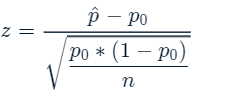

In [32]:
#alpha = ___
#df[column].value_counts(normalize = True)
#p_hat = (df[column] == "Condition").mean()
#p_o = 0.5
#n = len(df)
# numerator = p_hat - p_0
#denominator = np.sqrt((p_0 * (1 -p_0))/n)
#z_score = numerator / denominator 
#p_value = norm.cdf(z_score , loc = 0 , scale = 0)

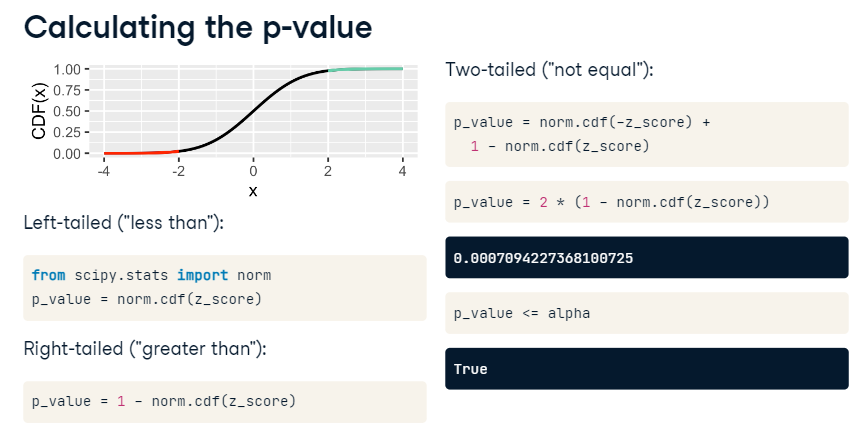

In [33]:
p_0 = 0.06 #Null Hypothesis
p_hat = (late_shipments["late"] == "Yes").mean() #Estimate
n = len(late_shipments)
numerator = p_hat - p_0 
denominator = np.sqrt((p_0 * (1 - p_0))/n)
z_score = numerator / denominator
left_tail_pvalue = norm.cdf(z_score) #Less than p_0
right_tail_pvalue = 1 - norm.cdf(z_score) #Greater than p_0
two_tail_pvalue = 2 * (1 - norm.cdf(z_score)) #Differnce

In [34]:
right_tail_pvalue <= 0.05 

False

## Two-Sample Proportion Tests

In [35]:
n = late_shipments.groupby("freight_cost_groups")["late"].count()
n

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [36]:
p = late_shipments.groupby("freight_cost_groups")["late"].value_counts(normalize=True)
p

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: proportion, dtype: float64

In [37]:
phats_expensive = p[("expensive","Yes")]
phats_reasonable = p[("reasonable" , "Yes")]
phats_expensive , phats_reasonable

(0.07909604519774012, 0.035164835164835165)

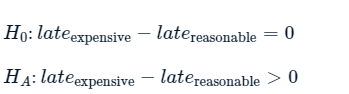

In [38]:
p_hat = (n[("expensive")] * phats_expensive + n[("reasonable")] * phats_reasonable)/(n["expensive"] + n["reasonable"])
pq = p_hat * (1 - p_hat)
pq_n  = pq/n["expensive"] + pq/n["reasonable"]
std_error = np.sqrt(pq_n)
z_score = (phats_expensive - phats_reasonable)/std_error
p_value = 1 - norm.cdf(z_score)
p_value

0.0017353400023595311

In [39]:
new_p = late_shipments.groupby("freight_cost_groups")["late"].value_counts(normalize=False)
new_p

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64

In [40]:
from statsmodels.stats.proportion import proportions_ztest
late_count = np.array([42 , 16])
n_rows = np.array([489 + 42 , 439 + 16])
z_score , p_value = proportions_ztest(count = late_count , 
                                      nobs = n_rows , alternative = "larger")
z_score , p_value


(2.922648567784529, 0.001735340002359578)

## Chi-square test of independence
Chi-square test extends proportion test of more than two group.
**Statistical independence** : proportion of successes in the response variable is the same across all categories of the explanatory variable

In [ ]:
#expected , observed , stats = pingouin.chi2_independence(data = df , 
# x = "column1" , y = "column2" , correction = False)

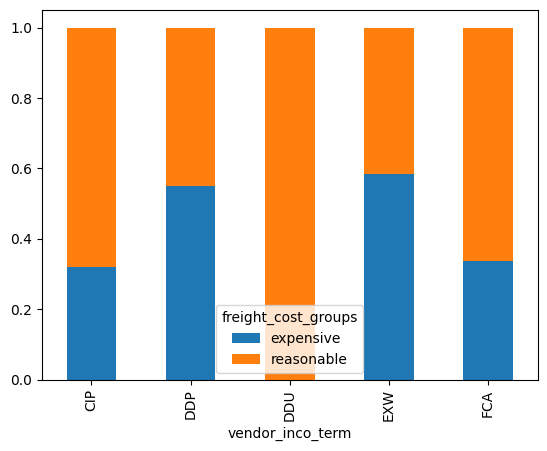

In [47]:
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(normalize=True)
wide_prop = props.unstack()
wide_prop.plot(kind = "bar" , stacked=True)
plt.show()

In [49]:
wide_prop

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,0.320000,0.680000
DDP,0.550000,0.450000
DDU,NaN,1.000000
EXW,0.583448,0.416552
FCA,0.336364,0.663636


In [ ]:
alpha = 0.1

In [53]:
expected , observed , stats = pingouin.chi2_independence(data = late_shipments , 
                                                         x = "freight_cost_groups" , 
                                                         y = "vendor_inco_term" , correction=False)
stats[stats["test"] == "pearson"]

c:\Users\A C E R\ml\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
c:\Users\A C E R\ml\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
c:\Users\A C E R\ml\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\A C E R\ml\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\A C E R\ml\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,34.805072,4.0,5.093922e-07,0.186561,0.999235


Since pval is less than alpha we reject the null hypothesis.
Concluding that the two groups are somehow associated.

## Chi-Square goodness of fit tests

Using single categorical variable to hypothesize the distribution.

In [59]:
n_total = len(late_shipments)
hypothesized = pd.DataFrame({
    "vendor_inco_term": ["CIP" , "DDP" , "DDU" , "EXW" , "FCA"] , 
    "prop": [0.05 , 0.1 , 0.2 , 0.55 , 0.1]
})
hypothesized["n"] = hypothesized["prop"] * n_total #Fitting the hypothesized frequency
hypothesized

,vendor_inco_term,prop,n
0,CIP,0.05,50.0
1,DDP,0.10,100.0
2,DDU,0.20,200.0
3,EXW,0.55,550.0
4,FCA,0.10,100.0


In [64]:
incoterm_counts = late_shipments["vendor_inco_term"].value_counts()
incoterm_counts = incoterm_counts.rename_axis("vendor_inco_term").reset_index(name = "n").sort_values("vendor_inco_term")
incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
4,DDU,1
0,EXW,732
1,FCA,111


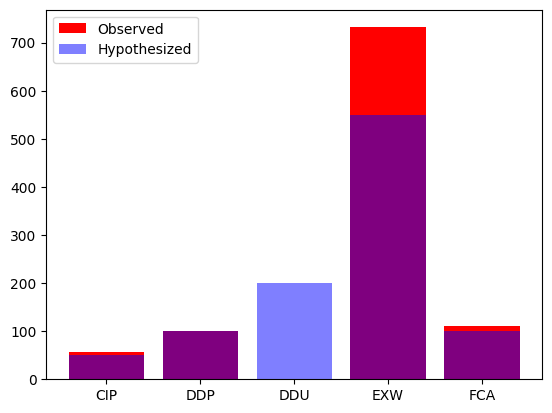

In [70]:
plt.bar(incoterm_counts["vendor_inco_term"] ,
         incoterm_counts["n"] ,
         color ="red" , 
           label = "Observed")
plt.bar(hypothesized["vendor_inco_term"] , 
        hypothesized["n"] , 
        color = "blue" , 
        label = "Hypothesized" , 
        alpha = 0.5)
plt.legend()
plt.show()

In [73]:
#Goodness of fit
#1 sample chi2 test
from scipy.stats import chisquare
stat_ , p_value =chisquare(f_obs = incoterm_counts["n"] , f_exp = hypothesized["n"])
stat_ , p_value

(260.1604545454545, 4.211262144770735e-55)

Here p_value is less than alpha (0.1) then we can reject Null hypothesis concluding that the variables are not  uniformly distributed among the categories.

# Non Parametric Tests

In [76]:
np.random.seed(42)
repub_votes_small = us_rep.sample(5)
repub_votes_small

,state,county,repub_percent_08,repub_percent_12
83,Texas,Terrell,62.235067,64.504505
53,New Mexico,Eddy,62.210720,65.301780
70,South Dakota,Bon Homme,54.942234,59.531555
45,Missouri,Montgomery,58.538251,65.515299
44,Missouri,Iron,47.349343,55.867031


In [77]:
#Trying paired t_test Disclaimer: We need n >=30
alpha = 0.01 
pingouin.ttest(x = repub_votes_small["repub_percent_08"] , 
               y = repub_votes_small["repub_percent_12"],
               paired= True,
               alternative="less")
#But we aren't sure since the n < 30

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.338891,4,less,0.006132,"[-inf, -2.59]",0.954471,12.165,0.54747


In [81]:
#So we use ranks of the data 
x  = [1,15,3,10, 3, 10,6]

In [82]:
from scipy.stats import rankdata
rankdata(x)

array([1. , 7. , 2.5, 5.5, 2.5, 5.5, 4. ])

In [97]:
#Step 1 => We take the differences between the pairs of data
repub_votes_small["diff"] = repub_votes_small["repub_percent_08"] - repub_votes_small["repub_percent_12"]
#Step 2 => Then take its absolute value
repub_votes_small["abs_diff"] = repub_votes_small["diff"].abs()
#Step 3 => Then rank the data
repub_votes_small["rank_abs_diff"] = rankdata(repub_votes_small["abs_diff"])
#Step 4 => Calculate T_Plus and T_minus  
T_Plus = repub_votes_small[repub_votes_small["diff"] > 0]["diff"].sum()
T_minus = repub_votes_small[repub_votes_small["diff"] <0]["diff"].abs().sum()
w = np.min([T_Plus , T_minus])
w

0.0

In [98]:
#or we can use pingouin
alpha = 0.01
pingouin.wilcoxon(x = repub_votes_small["repub_percent_08"] , 
                  y = repub_votes_small["repub_percent_12"] , 
                  alternative = "less")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.8


In [100]:
0.03125 > alpha #Null hypothesis accepted: That is the the difference is not that significance

True

## Mann Whitney U Test (t-test on ranks)
But works on unpaired data

In [101]:
weight_vs_late = late_shipments[["weight_kilograms" ,"late"]]
weight_vs_late_wide = weight_vs_late.pivot(
    columns="late" , 
    values="weight_kilograms"
)
weight_vs_late_wide

late,No,Yes
0,NaN,1426.0
1,10.0,NaN
2,3723.0,NaN
3,7698.0,NaN
4,56.0,NaN
...,...,...
995,43.0,NaN
996,99.0,NaN
997,NaN,881.0
998,16234.0,NaN


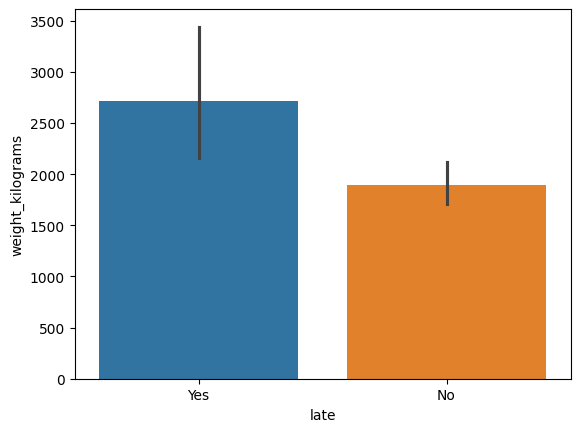

In [109]:
sns.barplot(data = late_shipments , 
            x = "late" , 
            y = "weight_kilograms" ,
              hue = "late" , 
              errorbar= ("ci" , 95) ) #95% Confidence interval for mean weight
plt.show()

In [104]:
alpha = 0.01 
#mnu => Mann-Whitney test
pingouin.mwu(x = weight_vs_late_wide["No"] , 
             y = weight_vs_late_wide["Yes"],
             alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,19134.0,two-sided,0.000014,0.331902,0.334049


Here p-value is less than 0.01 thus indicating there is difference on weight of shipment considering it was late or not.

## Kruskal-Wallis test
Extends Mann-Whitney-U test for more than 2 categories.

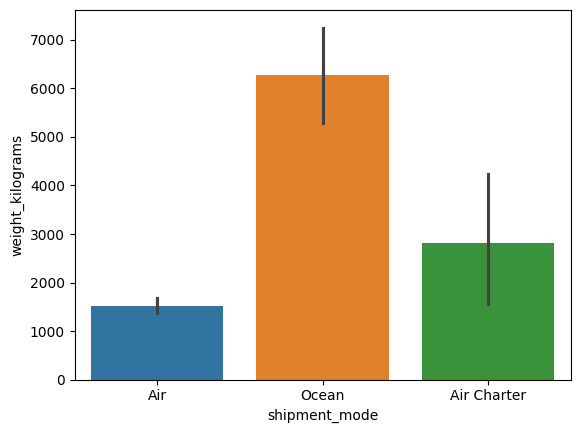

In [115]:
sns.barplot(
    data = late_shipments,
    x = "shipment_mode" , 
    y = "weight_kilograms",
    hue = "shipment_mode" , 

    
)
plt.show()

In [110]:
alpha = 0.01 
pingouin.kruskal(data = late_shipments , 
                 dv = "weight_kilograms" , 
                 between="shipment_mode")

,Source,ddof1,H,p-unc
Kruskal,shipment_mode,2,125.096618,6.848799e-28


Again p-value is less than alpha, Indicating there is difference between at least one of the category of the shipment mode with other.